# Communicate Data Findings Project:
## Ford GoBike System Data Set
### Data Set Overview:
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- This analysis aims to discover the variables which affect the trip duration by using univariate, bivariate and multivariate exploration.

# Data Wrangling

In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
#Load the data into a panda dataframe
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#Number of rows & columns 
df.shape

(183412, 16)

**The data set contains**
- 183412 Row
- 16 Column

In [4]:
#Looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Drop the rows which contain missing values
df = df.dropna(axis=0 , how='any', inplace = False)

In [6]:
#Number of rows & columns of the new dataframe 
df.shape

(174952, 16)

**After removing the rows which contains null values, the data set contains**
- 174952 Row
- 16 Column

In [7]:
#Convert the type of start time & end time to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
#Looking for duplicated rows
df.duplicated().sum()

0

**There is no duplicated rows**

In [9]:
#Descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
#Display the first five rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


# Univariate Exploration:

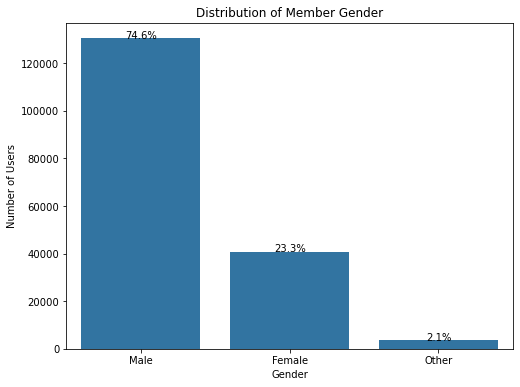

In [11]:
#Univariate plot for member gender
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
order = df['member_gender'].value_counts().index
sb.countplot(data = df , x = 'member_gender', color = base_color, order = order);
gender_count = df['member_gender'].value_counts()
for i in range (gender_count.shape[0]):
    count = gender_count[i]
    pct_string = '{:0.1f}%'.format(100 * count / df.shape[0])
    plt.text(i, count+1, pct_string, ha = 'center')
plt.xlabel('Gender')
plt.ylabel('Number of Users');
plt.title('Distribution of Member Gender');

## Gender Distribution
- **As shown, 74.6% of the users are males and 23.3% females.**

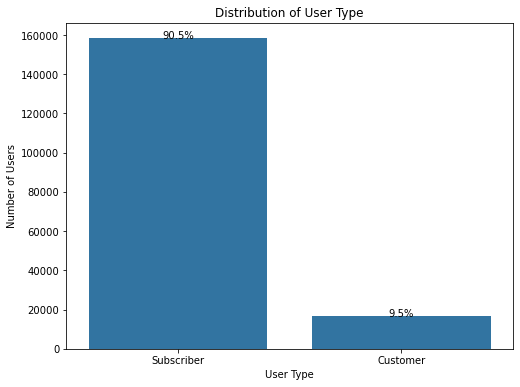

In [12]:
#Univariate plot for user type
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
order = df['user_type'].value_counts().index
sb.countplot(data = df , x = 'user_type', color = base_color, order = order);
user_type_count = df['user_type'].value_counts()
for i in range (user_type_count.shape[0]):
    count = user_type_count[i]
    pct_string = '{:0.1f}%'.format(100 * count / df.shape[0])
    plt.text(i, count+1, pct_string, ha = 'center')
plt.xlabel('User Type')
plt.ylabel('Number of Users');
plt.title('Distribution of User Type');

## User Type Distribution
- **As shown, 90.5% of the users are subscribers and only 9.5% are customers**

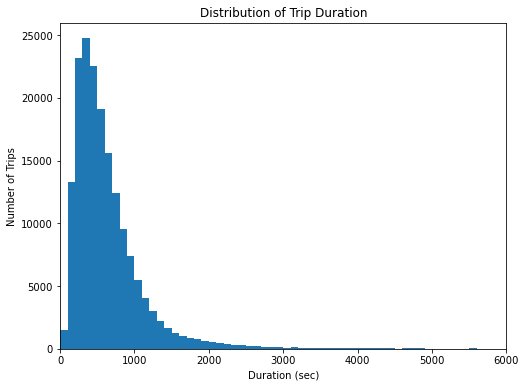

In [13]:
#Histogram for trip duration 
plt.figure(figsize = [8,6])
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xlim(0, 6000);
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Duration');

**The figure shows long_tailed distribution. So, we will try using the log transformation**

In [14]:
#Convert the duration from seconds to minutes 
df['duration_min'] = df['duration_sec']/60

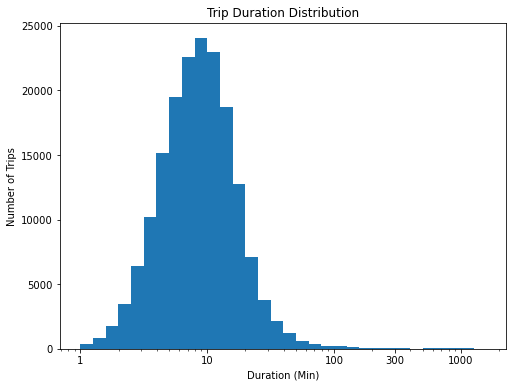

In [15]:
#Histogram for trip duration variable with log transformation
plt.figure(figsize = [8,6])
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max()) + 0.1, 0.1)
ticks = [1, 10, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (Min)');
plt.ylabel('Number of Trips')
plt.title('Trip Duration Distribution');

## Trip Duration Distribution
- **After log transformation the trip duration follows unimodal distribution with peak value at 10 minutes** 

In [16]:
#Calculate the age of each user
from datetime import datetime, date
def calculate_Age(born):
    today = date.today()
    age = today.year - born
    return age
df['Age'] = df.member_birth_year.map(calculate_Age)

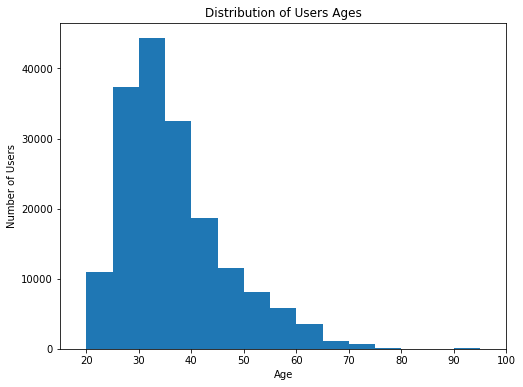

In [17]:
#Plot the distribution of the users' ages
plt.figure(figsize = [8,6])
bins = np.arange(0, df['Age'].max() + 5, 5)
ticks = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x='Age', bins = bins)
plt.xlim(15,70)
plt.xticks(ticks, labels);
plt.xlabel('Age');
plt.ylabel('Number of Users')
plt.title('Distribution of Users Ages');

## Age Distribution 
- **Right skewed distribution with peak value between 30-35 years**

# The distributions of interest:
- Almost 74.6% of the users are males And 23.3% are females.
- 90.5 of the users are subscribers and only 9.5% are customers.
- The distribution of the duration_sec variable looks long_tailed distribution, so I used log transform and convert the data from seconds to minutes. Under the transformation the distribution looks unimodal with peak value at ten minutes.
- From the member birth year column, I create a new column contains the age of each customer. The age distribution is right skewed with peak value between 30-35 years.

# Bivariate Exploration:

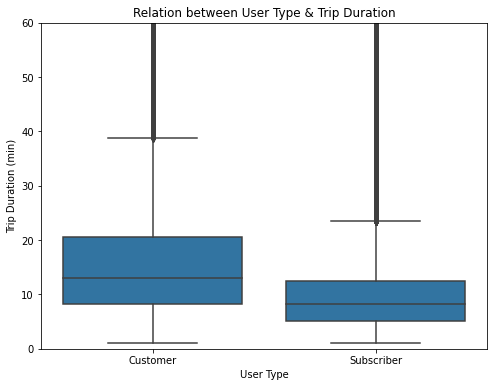

In [18]:
#Relation between trip duration & user type
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x='user_type', y='duration_min', color = base_color)
plt.ylim((0,60))
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.title('Relation between User Type & Trip Duration');

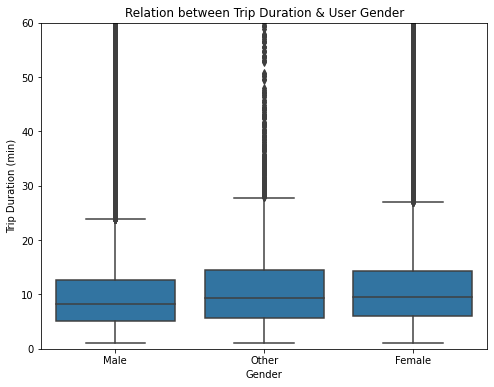

In [19]:
#Relation between trip duration & gender 
plt.figure(figsize = [8,6])
sb.boxplot(data = df, x='member_gender', y='duration_min', color = base_color)
plt.ylim((0,60))
plt.xlabel('Gender')
plt.ylabel('Trip Duration (min)')
plt.title('Relation between Trip Duration & User Gender');

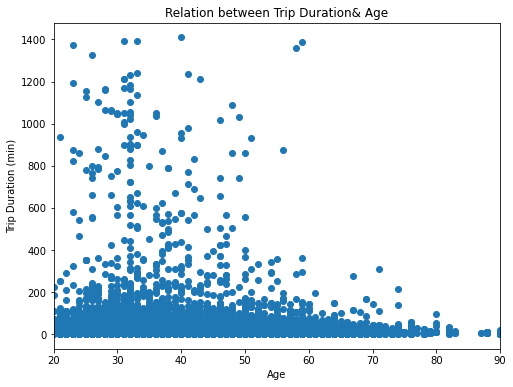

In [20]:
#Relation between trip duration & user type
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
plt.scatter(data = df, x='Age', y='duration_min', color = base_color)
plt.xlim((20, 90))
plt.xlabel('Age')
plt.ylabel('Trip Duration (min)')
plt.title('Relation between Trip Duration& Age');

**There is no significant difference in the trip duration at the age from 20 to 50 years, with the highest trip duration with the age of 32 years. The older ages have lower trip duration.**

# The relationships of interest:
- There is no significant difference in trip duration average between males, females and other.
- The customer users have higher trip duration than the subscriber users.
- There is no significant difference in the trip duration at the age from 20 to 50 years, with the highest trip duration with the age of 32 years.
- With higher ages the trip duration decreases in a significant way.

# Multivariate Exploration:

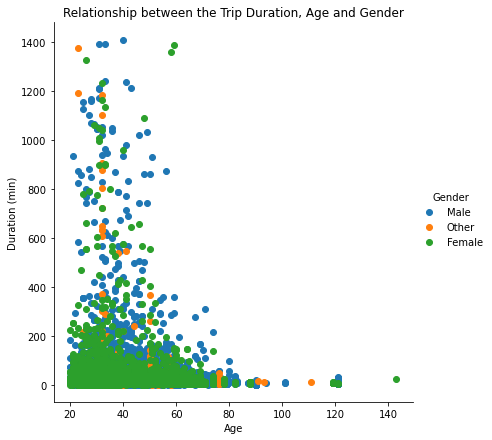

In [21]:
#Plot the relationship between member gender, age and the trip duration
g = sb.FacetGrid(data = df, hue = 'member_gender', height = 6)
g.map(plt.scatter, 'Age', 'duration_min');
g.add_legend(title = 'Gender');
plt.title('Relationship between the Trip Duration, Age and Gender');
plt.xlabel('Age')
plt.ylabel('Duration (min)');

**Large number of points causes overplotting, so I will try using faceted scatterplot.**

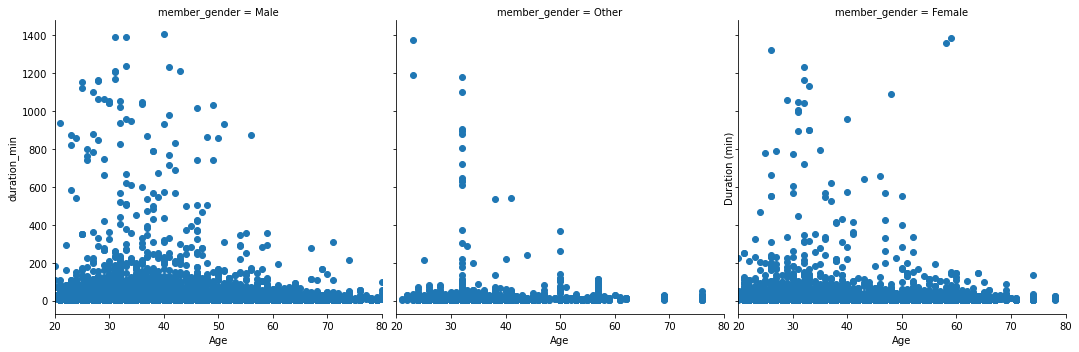

In [22]:
#Plot faceted scatterplot
g = sb.FacetGrid(data = df, col = 'member_gender', height = 5)
g.map(plt.scatter, 'Age', 'duration_min');
plt.xlim((20, 80))
plt.xlabel('Age')
plt.ylabel('Duration (min)');

## Trip Duration across Gender & Age
- **Males have higher trip duration than females and other gender.**
- **Other gender has highest trip duration at 32 years.**

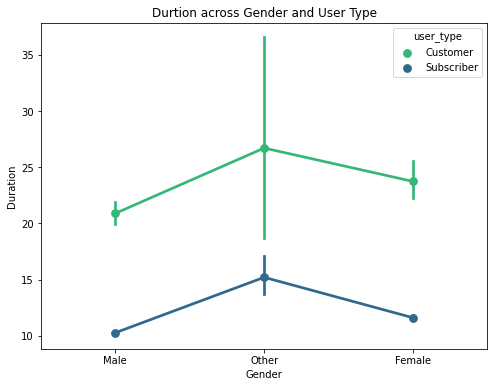

In [23]:
#Plot the relation between duration, gender and user type
plt.figure(figsize = [8, 6])
sb.pointplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'user_type', dodge=False, palette = 'viridis_r');
plt.xlabel('Gender')
plt.ylabel('Duration')
plt.title('Durtion across Gender and User Type');

## Trip Duration Across Gender & User Type
- **The customer users have higher trip duration than the subscribers with different genders.**

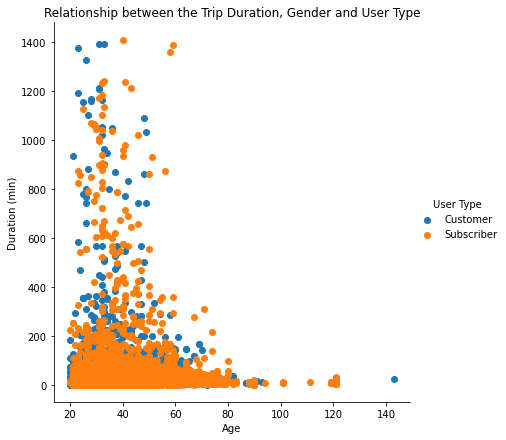

In [24]:
#Plot the relationship between user type, age and the trip duration
g = sb.FacetGrid(data = df, hue = 'user_type', height = 6)
g.map(plt.scatter, 'Age', 'duration_min');
g.add_legend(title = 'User Type');
plt.title('Relationship between the Trip Duration, Gender and User Type');
plt.xlabel('Age')
plt.ylabel('Duration (min)');

**Large number of points causes overplotting, so I will try using faceted scatterplot.**

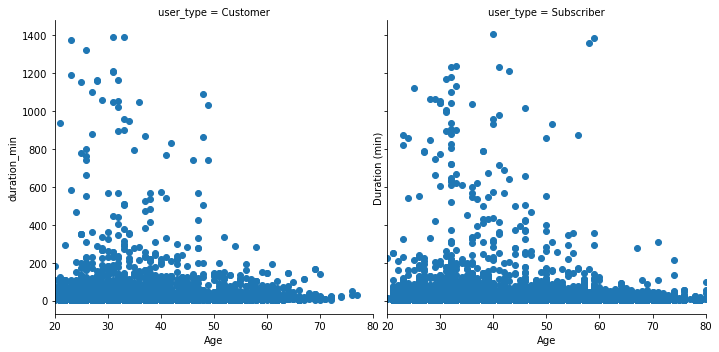

In [25]:
#Try faceted scatterplot
g = sb.FacetGrid(data = df, col = 'user_type', height = 5, margin_titles = True)
g.map(plt.scatter, 'Age', 'duration_min');
plt.xlim((20, 80));
plt.xlabel('Age')
plt.ylabel('Duration (min)');

## Trip Duration across Age & User Type
- **The two distributions are almost similar, but the subscribers users have high trip duration for older age (above 50 years) than the customer users.**

# Conclusion
-  Almost 74.6% of the users are males, 23.3% are females and 2.1% other. 
*  There is no significant difference in trip duration between the different genders.
-  90.5 of the users are subscribers and only 9.5% are customers. 
- The customers usually have higher trip duration than the subscribers across different genders. So, the user type affect the trip duration.
- There is significant decrease in the trip duration with older ages for all genders.